<a href="https://colab.research.google.com/github/jeniferGoncalvesDaSilvaDev/statsmodel-learn/blob/main/Statsmodel_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
!pip install wbdata

In [130]:
import wbdata as wb

In [131]:
#import wbdata
import pandas as pd
import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [132]:
#wbdata.get_countries(query='Brazil')

In [133]:
wbdata.get_sources()

  id  name
----  --------------------------------------------------------------------
   1  Doing Business
   2  World Development Indicators
   3  Worldwide Governance Indicators
   5  Subnational Malnutrition Database
   6  International Debt Statistics
  11  Africa Development Indicators
  12  Education Statistics
  13  Enterprise Surveys
  14  Gender Statistics
  15  Global Economic Monitor
  16  Health Nutrition and Population Statistics
  18  IDA Results Measurement System
  19  Millennium Development Goals
  20  Quarterly Public Sector Debt
  22  Quarterly External Debt Statistics SDDS
  23  Quarterly External Debt Statistics GDDS
  25  Jobs
  27  Global Economic Prospects
  28  Global Financial Inclusion
  29  The Atlas of Social Protection: Indicators of Resilience and Equity
  30  Exporter Dynamics Database – Indicators at Country-Year Level
  31  Country Policy and Institutional Assessment
  32  Global Financial Development
  33  G20 Financial Inclusion Indicators
  34  Glob

In [134]:
indicadores= wbdata.get_indicators(source=2)

In [135]:
indicadores

id                          name
--------------------------  ---------------------------------------------------------------------------------------------------------------------------------------------
AG.CON.FERT.PT.ZS           Fertilizer consumption (% of fertilizer production)
AG.CON.FERT.ZS              Fertilizer consumption (kilograms per hectare of arable land)
AG.LND.AGRI.K2              Agricultural land (sq. km)
AG.LND.AGRI.ZS              Agricultural land (% of land area)
AG.LND.ARBL.HA              Arable land (hectares)
AG.LND.ARBL.HA.PC           Arable land (hectares per person)
AG.LND.ARBL.ZS              Arable land (% of land area)
AG.LND.CREL.HA              Land under cereal production (hectares)
AG.LND.CROP.ZS              Permanent cropland (% of land area)
AG.LND.EL5M.RU.K2           Rural land area where elevation is below 5 meters (sq. km)
AG.LND.EL5M.RU.ZS           Rural land area where elevation is below 5 meters (% of total land area)
AG.LND.EL5M.UR.K2  

In [136]:
# Define os países e os IDs dos indicadores
paises = 'BRA'
indicadores = {'NY.GDP.MKTP.CD': 'PIB', 'FP.CPI.TOTL.ZG': 'Inflação'}

# Define o período de tempo desejado
data_inicio = datetime.datetime(2010, 1, 1)
data_fim = datetime.datetime(2023, 12, 31)

# Busca os dados
# Changed to pass data_inicio and data_fim directly instead of extracting just the years
df = wb.get_dataframe(indicadores, country=paises, date=(data_inicio, data_fim))

# Exibe os dados
df

,PIB,Inflação
date,,
2023,2.173666e+12,4.593563
2022,1.951924e+12,9.280106
2021,1.670647e+12,8.301660
2020,1.476107e+12,3.211768
2019,1.873288e+12,3.732976
2018,1.916934e+12,3.664850
2017,2.063515e+12,3.446373
2016,1.795693e+12,8.739144
2015,1.802212e+12,9.029901


In [137]:
df.columns

Index(['PIB', 'Inflação'], dtype='object')

In [138]:
x = df['PIB']
y = df['Inflação']

In [141]:


import numpy as np
from scipy.stats import linregress

# Supondo que 'x' e 'y' sejam as séries do PIB e Inflação, respectivamente
# Certifique-se de que x e y não contenham valores NaN ou infinitos
x = x.dropna()
y = y.dropna()

# Converter para arrays NumPy se necessário
x = np.array(x)
y = np.array(y)


# Calcula a regressão linear
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Imprime os resultados
print(f"Coeficiente Angular (Inclinação): {slope}")
print(f"Intercepto: {intercept}")
print(f"Coeficiente de Correlação (R): {r_value}")
print(f"Valor-p: {p_value}")
print(f"Erro Padrão: {std_err}")

Coeficiente Angular (Inclinação): -2.302266570456339e-13
Intercepto: 6.4482738788614
Coeficiente de Correlação (R): -0.03634533409377783
Valor-p: 0.9018283165114928
Erro Padrão: 1.827381742788278e-12


In [139]:


# Criar o modelo de regressão: Inflação ~ PIB
modelo = smf.ols("Inflação ~ PIB", data=df).fit()

# Exibir o sumário estatístico
print(modelo.summary())

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  res = hypotest_fun_out(*samples, **kwds)


                            OLS Regression Results                            
Dep. Variable:               Inflação   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.082
Method:                 Least Squares   F-statistic:                   0.01587
Date:                Thu, 13 Feb 2025   Prob (F-statistic):              0.902
Time:                        21:57:55   Log-Likelihood:                -30.208
No. Observations:                  14   AIC:                             64.42
Df Residuals:                      12   BIC:                             65.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.4483      3.826      1.685      0.1

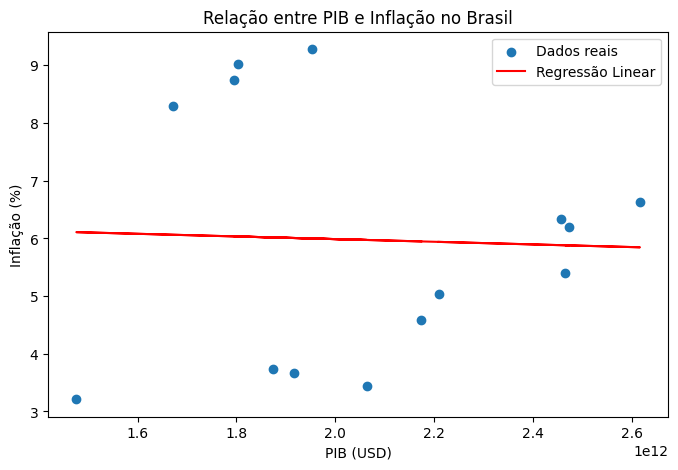

In [140]:
import matplotlib.pyplot as plt
import numpy as np

# Criar gráfico
plt.figure(figsize=(8, 5))
plt.scatter(df["PIB"], df["Inflação"], label="Dados reais")
plt.plot(df["PIB"], modelo.predict(df["PIB"]), color="red", label="Regressão Linear")

plt.xlabel("PIB (USD)")
plt.ylabel("Inflação (%)")
plt.title("Relação entre PIB e Inflação no Brasil")
plt.legend()
plt.show()